In [1]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

In [4]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [5]:
def plsr_diff(k, p_inp=10):
    
    # Number of datapoints in outcome.
    n = 1000

    # Number of features.
    p = p_inp

    # Create random normally distributed data for parameters.
    X = np.random.normal(size=n * p).reshape((n, p))

    # Create normally distributed outcome related to parameters but with noise.
    y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
    
    # Fit a linear model with all 10 features.
    regr = linear_model.LinearRegression(10)
    regr.fit(X, y)

    # Save predicted values.
    Y_pred = regr.predict(X)
    r_r_sq = regr.score(X, y)

    # Fit a linear model using Partial Least Squares Regression.
    # Reduce feature space to k dimensions.
    pls1 = PLSRegression(n_components=k)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    pls_r_sq = pls1.score(X, y)
    
    # Difference between predictions
    difference = abs(pls_r_sq - r_r_sq)

    return difference

## The benefit of increasing the number of components included in a PLSR model diminishes rapidly with increased _n_.

##### Differences between linear regression outcomes & PLSR outcomes given _n_ components are reproduced below:

    k          diff
0   1  1.085129e-02
1   2  3.211698e-05
2   3  6.673548e-08
3   4  1.102286e-09
4   5  9.621193e-13
5   6  6.405987e-14
6   7  1.110223e-16
7   8  0.000000e+00
8   9  0.000000e+00
9  10  0.000000e+00


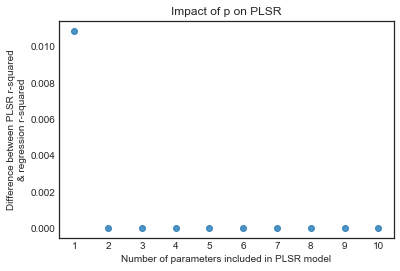

In [6]:
plsr_diff_df = pd.DataFrame({'k':np.arange(1,11)})
plsr_diff_df['diff'] = plsr_diff_df['k'].apply(lambda x: plsr_diff(x,10))

print(plsr_diff_df)

differences = sns.regplot(x='k',
                          y='diff',
                          data=plsr_diff_df,
                          fit_reg=False)

plt.title('Impact of p on PLSR')
plt.xlabel('Number of parameters included in PLSR model')
plt.ylabel('Difference between PLSR r-squared\n& regression r-squared')
plt.xticks(np.arange(1,11))

plt.show()

In [9]:
def plsr(k):
    # Number of datapoints in outcome.
    n = 1000

    # Number of features.
    p = 10

    # Create random normally distributed data for parameters.
    X = np.random.normal(size=n * p).reshape((n, p))

    # Create normally distributed outcome related to parameters but with noise.
    y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

    
    # Fit a linear model with all 10 features.
    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # Save predicted values.
    Y_pred = regr.predict(X)
    print('R-squared regression:', regr.score(X, y))

    # Fit a linear model using Partial Least Squares Regression.
    # Reduce feature space to 3 dimensions.
    pls1 = PLSRegression(n_components=k)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('R-squared PLSR:', pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by 3 features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

##### Presented another way:

R-squared regression: 0.835715379331
R-squared PLSR: 0.831055877805


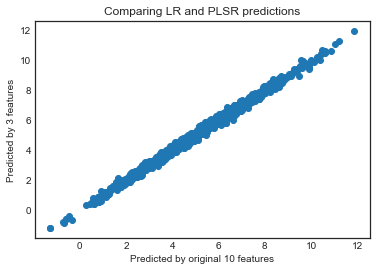

R-squared regression: 0.835090810236
R-squared PLSR: 0.835073842842


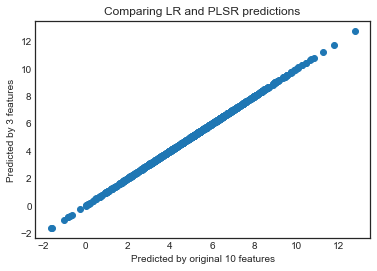

In [10]:
plsr(1)
plsr(2)

##### This makes sense – every time PLSR selects a vector that explains the most possible variance, it leaves less overall unexplained variance remaining for future vectors.

In [ ]:
# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])